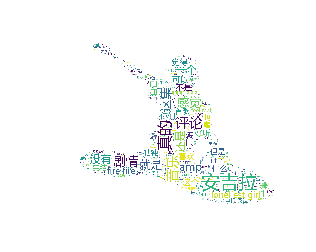

In [9]:
import csv
import re
import jieba
with open('C:\\Users\\zzlw_\\Desktop\\bilibili.csv','rt',encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    content = [row[3] for row in reader]
    content2=[row[1] for row in reader]
s=" ".join(content)
#使用正则表达式过滤掉英文
str = re.sub("[A-Za-z0-9\!\%\[\]\,\。]", "", s)
words1=jieba.lcut(str)
#统计词频
data1={}
for chara in words1:
    if len(chara)<2:
        continue
    if chara in data1:
        data1[chara]+=1
    else:
        data1[chara]=1    
data1=sorted(data1.items(),key = lambda x:x[1],reverse = True) 
#rint(data1)
import pygal
hist=pygal.Bar()
hist.title="该番剧评论中二十大高频词"
hist.x_labels=[]
for i in range(20):
    hist.x_labels.append(data1[i][0])
hist.x_title="词汇"
hist.y_title="出现次数"
y=[]
for j in  range(20):
    y.append(data1[j][1])
hist.add('CAROLE & TUESDAY',y)
hist.render_to_file('C:\\Users\\zzlw_\\Desktop\\bilibili.svg')
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from os import path
import cv2
%matplotlib inline
imgMask=cv2.imread('C:\\Users\\zzlw_\\Desktop\\8612260-7c57fbd1f7fc9e47.png')   #读入背景图片
jbText=' '.join(jieba.cut(s))
wc=WordCloud(
    background_color='white',
    width=1600,
    height=900,
    max_words=500,
    font_path='msyh.ttc',    #默认不支持中文
    mask=imgMask,  #设置背景图片
    random_state=30 #生成多少种配色方案
).generate(jbText)
ImageColorGenerator(imgMask)   #根据图片生成词云颜色
#lt.imshow(wc)
plt.axis('off')
plt.show()
sex=" ".join(content2)
